In [2]:
import cv2
import numpy as np

def preprocess_image(image):
    # Image standardization steps (e.g., color balance adjustment, resizing)
    standardized_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Apply additional preprocessing techniques as needed
    
    return standardized_image

def segment_fungal_colonies(image):
    # Perform image segmentation to detect fungal colonies
    # Example segmentation method (replace with your preferred technique)
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply morphological operations (e.g., erosion, dilation) to refine segmentation
    
    return binary_image

# Load the full image
full_image = cv2.imread('p20.jpg')

new_width = 345.6
new_height = 460.8

# Resize the image
resized_image = cv2.resize(full_image, (int(new_width), int(new_height)))

# Check if the image was loaded successfully
if resized_image is None:
    print("Error: Unable to load the image. Please check the file path and format.")
else:
    # Calculate the height for the cropped region (half of original height)
    crop_height = resized_image.shape[0] // 2
    
    # Define the coordinates for the cropped region (from top to bottom)
    x1 = 0
    x2 = resized_image.shape[1]  # Use shape[1] for width
    y1 = 0
    y2 = crop_height
   
    # Perform the crop
    cropped_image = resized_image[y1:y2, x1:x2]
    
    # Preprocess the cropped image
    preprocessed_image = preprocess_image(cropped_image)
    
    # Segment fungal colonies
    binary_image = segment_fungal_colonies(preprocessed_image)

    # Invert the binary image
    binary_image = cv2.bitwise_not(binary_image)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to separate the fungus part
    mask = np.zeros_like(cropped_image)

    # Draw contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(cropped_image, mask)
    
    # Display the segmented image
    cv2.imshow('Segmented Image', segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [45]:
import cv2
import numpy as np

# Load the full image
full_image = cv2.imread('1.jpg')

new_width = 345.6
new_height = 460.8

# Resize the image
resized_image = cv2.resize(full_image, (int(new_width), int(new_height)))

# Check if the image was loaded successfully
if resized_image is None:
    print("Error: Unable to load the image. Please check the file path and format.")
else:
    # Calculate the height for the cropped region (half of original height)
    crop_height = resized_image.shape[0] // 2
    
    # Define the coordinates for the cropped region (from top to bottom)
    x1 = 0
    x2 = resized_image.shape[1]
    y1 = 10
    y2 = crop_height
   
    # Perform the crop
    cropped_image = resized_image[y1:y2, x1:x2]
  
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Adjust kernel size as needed
    
    # Apply a threshold to segment the fungus part
    _, binary_image = cv2.threshold(blurred_image,50, 255, cv2.THRESH_BINARY)

    # Invert the binary image
    binary_image = cv2.bitwise_not(binary_image)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to separate the fungus part
    mask = np.zeros_like(cropped_image)

    # Draw contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    segmented_image = cv2.bitwise_and(cropped_image, mask)
    cv2.imwrite('segmented_image_20.jpg', segmented_image)
    
    # Display the segmented image
    cv2.imshow('Segmented Image', segmented_image)
    cv2.imshow('Cropped Image', cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


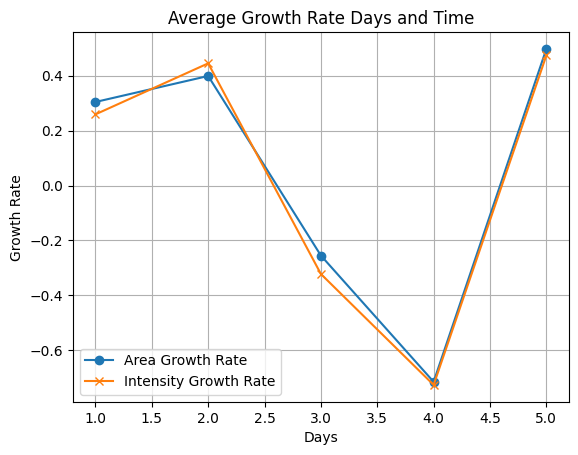

Day 1, Click 1 - Area: 4743.0 pixels squared
Day 1, Click 1 - Mean Intensity: 1.3631357048748354
Day 1, Click 2 - Area: 6187.0 pixels squared
Day 1, Click 2 - Mean Intensity: 1.7167061923583662
Day 1, Click 3 - Area: 8657.0 pixels squared
Day 1, Click 3 - Mean Intensity: 2.4810408432147564
Day 1, Click 4 - Area: 6448.0 pixels squared
Day 1, Click 4 - Mean Intensity: 1.681185770750988
Day 2, Click 1 - Area: 1836.0 pixels squared
Day 2, Click 1 - Mean Intensity: 0.4596837944664032
Day 2, Click 2 - Area: 2750.0 pixels squared
Day 2, Click 2 - Mean Intensity: 0.6776152832674572
Day 2, Click 3 - Area: 2674.0 pixels squared
Day 2, Click 3 - Mean Intensity: 0.6247562582345191
Day 2, Click 4 - Area: 2210.0 pixels squared
Day 2, Click 4 - Mean Intensity: 0.46039525691699607
Day 3, Click 1 - Area: 1551.0 pixels squared
Day 3, Click 1 - Mean Intensity: 0.2878392621870883
Day 3, Click 2 - Area: 1848.0 pixels squared
Day 3, Click 2 - Mean Intensity: 0.3676548089591568
Day 3, Click 3 - Area: 2832.0 

In [49]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function for area calculation
def calculate_area(mask):
    # Calculate the area of the segmented region
    area = np.sum(mask) / 255.0  # Convert to binary mask (0 or 255)
    return area

# Function for intensity analysis
def analyze_intensity(segmented_image):
    # Convert the segmented image to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Compute the mean intensity of the segmented region
    mean_intensity = np.mean(gray_image)
    return mean_intensity

# Function for comparing growth over n days
def compare_growth(data):
    # Assuming 'data' is a list of area or intensity values for each day
    growth_rate = []
    for i in range(1, len(data)):
        rate = (data[i] - data[i-1]) / data[i-1]
        growth_rate.append(rate)
    return growth_rate

# Load segmented images for each day
segmented_images = []
clicks_per_day = 4
total_days = 5

for day in range(1, total_days + 1):
    for click in range(1, clicks_per_day + 1):
        image_path = f"segmented_image_{(day-1)*clicks_per_day + click}.jpg"
        if os.path.exists(image_path):
            segmented_image = cv2.imread(image_path)
            segmented_images.append(segmented_image)
        else:
            print(f"Error: Image for day {day}, click {click} not found.")
            segmented_images.append(None)

# Calculate area and intensity for each day
area_data = []
intensity_data = []
for segmented_image in segmented_images:
    if segmented_image is not None:
        # Threshold the image to obtain the mask of the black fungus colony
        _, binary_image = cv2.threshold(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
        area = calculate_area(binary_image)
        intensity = analyze_intensity(segmented_image)
        area_data.append(area)
        intensity_data.append(intensity)
    else:
        area_data.append(None)
        intensity_data.append(None)

# Compare growth over n days
area_growth_rate = compare_growth(area_data)
intensity_growth_rate = compare_growth(intensity_data)

# Plotting the growth rate graph
total_images = len(segmented_images)  # Calculate total images
total_days = total_images // clicks_per_day  # Calculate total days
days = np.arange(1, total_days + 1)  # Generate x-axis values for each day
plt.plot(days, area_growth_rate[:total_days], marker='o', label='Area Growth Rate')
plt.plot(days, intensity_growth_rate[:total_days], marker='x', label='Intensity Growth Rate')
plt.xlabel('Days')
plt.ylabel('Growth Rate')
plt.title('Average Growth Rate Days and Time')
plt.legend()
plt.grid(True)

plt.savefig('growth_rate_graph2.png')

plt.show()

# Print or visualize the results
for idx, (segmented_image, area, intensity) in enumerate(zip(segmented_images, area_data, intensity_data), start=1):
    if segmented_image is not None:
        # Calculate the corresponding day
        day = (idx - 1) // clicks_per_day + 1
        
        # Display segmented image
        #cv2.imshow(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Segmented Image", segmented_image)
        
        # Print area and intensity data
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Area: {area} pixels squared")
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Mean Intensity: {intensity}")

        # Display image of fungus growth
        #cv2.imshow(f"Fungus Growth - Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day}", segmented_image)
        
        # Wait for key press to move to next image or exit
        key = cv2.waitKey(0)  # Changed from cv2.waitKey(1)
        if key == 27:  # Esc key to exit
            break
    else:
        print(f"Error: Image for day {day}, click {click} not found.")

cv2.destroyAllWindows()

print("Area Data (in pixels squared):\n", area_data)
print("Intensity Data (mean intensity):\n", intensity_data)
print("Area Growth Rate:\n", area_growth_rate)
print("Intensity Growth Rate:\n", intensity_growth_rate)


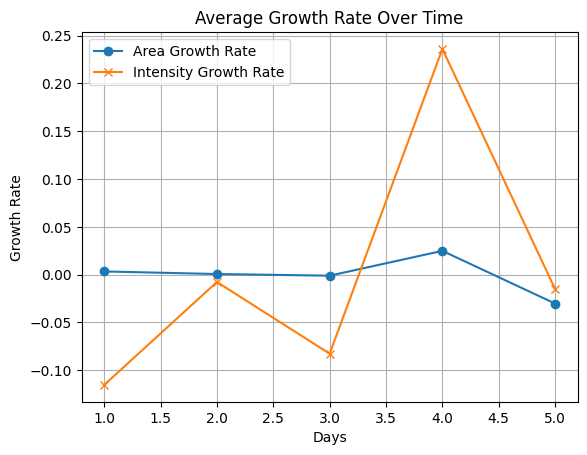

Day 1, Click 1 - Area: 39771.0 pixels squared
Day 1, Click 1 - Mean Intensity: 164.83742911153118
Day 1, Click 2 - Area: 39903.0 pixels squared
Day 1, Click 2 - Mean Intensity: 145.81863894139886
Day 1, Click 3 - Area: 39928.0 pixels squared
Day 1, Click 3 - Mean Intensity: 144.69483301827347
Day 1, Click 4 - Area: 39884.0 pixels squared
Day 1, Click 4 - Mean Intensity: 132.72681789540013
Day 2, Click 1 - Area: 40875.0 pixels squared
Day 2, Click 1 - Mean Intensity: 164.06141146817896
Day 2, Click 2 - Area: 39638.0 pixels squared
Day 2, Click 2 - Mean Intensity: 161.5729300567108
Day 2, Click 3 - Area: 40738.0 pixels squared
Day 2, Click 3 - Mean Intensity: 157.95299306868304
Day 2, Click 4 - Area: 39951.0 pixels squared
Day 2, Click 4 - Mean Intensity: 154.32283553875237
Day 3, Click 1 - Area: 39962.0 pixels squared
Day 3, Click 1 - Mean Intensity: 141.7960554505356
Day 3, Click 2 - Area: 39883.0 pixels squared
Day 3, Click 2 - Mean Intensity: 131.47056080655324
Day 3, Click 3 - Area:

In [47]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function for area calculation
def calculate_area(mask):
    # Calculate the area of the segmented region
    area = np.sum(mask) / 255.0  # Convert to binary mask (0 or 255)
    return area

# Function for intensity analysis
def analyze_intensity(segmented_image):
    # Convert the segmented image to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Compute the mean intensity of the segmented region
    mean_intensity = np.mean(gray_image)
    return mean_intensity

# Function for comparing growth over n days
def compare_growth(data):
    # Assuming 'data' is a list of area or intensity values for each day
    growth_rate = []
    for i in range(1, len(data)):
        rate = (data[i] - data[i-1]) / data[i-1]
        growth_rate.append(rate)
    return growth_rate

# Load segmented images for each day
segmented_images = []
clicks_per_day = 4
total_days = 5

for day in range(1, total_days + 1):
    for click in range(1, clicks_per_day + 1):
        image_path = f"cropped_image_{(day-1)*clicks_per_day + click}.jpg"
        if os.path.exists(image_path):
            segmented_image = cv2.imread(image_path)
            segmented_images.append(segmented_image)
        else:
            print(f"Error: Image for day {day}, click {click} not found.")
            segmented_images.append(None)

# Calculate area and intensity for each day
area_data = []
intensity_data = []
for segmented_image in segmented_images:
    if segmented_image is not None:
        # Noise Reduction
        segmented_image = cv2.GaussianBlur(segmented_image, (5, 5), 0)
        
        # Convert to grayscale
        gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
        
        # Contrast Enhancement
        equalized_image = cv2.equalizeHist(gray_image)
        
        # Thresholding
        _, binary_image = cv2.threshold(equalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Contour Detection
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Masking
        mask = np.zeros_like(binary_image)
        cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
        
        area = calculate_area(mask)
        intensity = analyze_intensity(segmented_image)
        area_data.append(area)
        intensity_data.append(intensity)
    else:
        area_data.append(None)
        intensity_data.append(None)

# Compare growth over n days
area_growth_rate = compare_growth(area_data)
intensity_growth_rate = compare_growth(intensity_data)

# Plotting the growth rate graph
total_images = len(segmented_images)  # Calculate total images
total_days = total_images // clicks_per_day  # Calculate total days
days = np.arange(1, total_days + 1)  # Generate x-axis values for each day
plt.plot(days, area_growth_rate[:total_days], marker='o', label='Area Growth Rate')
plt.plot(days, intensity_growth_rate[:total_days], marker='x', label='Intensity Growth Rate')
plt.xlabel('Days')
plt.ylabel('Growth Rate')
plt.title('Average Growth Rate Over Time')
plt.legend()
plt.grid(True)
plt.savefig('growth_rate_graph.png')
plt.show()

# Print or visualize the results
for idx, (segmented_image, area, intensity) in enumerate(zip(segmented_images, area_data, intensity_data), start=1):
    if segmented_image is not None:
        # Calculate the corresponding day
        day = (idx - 1) // clicks_per_day + 1
        
        # Display segmented image
        cv2.imshow(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Segmented Image", segmented_image)
        
        # Print area and intensity data
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Area: {area} pixels squared")
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Mean Intensity: {intensity}")

        # Display image of fungus growth
        #cv2.imshow(f"Fungus Growth - Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day}", segmented_image)
        
        # Wait for key press to move to next image or exit
        key = cv2.waitKey(0)  # Changed from cv2.waitKey(1)


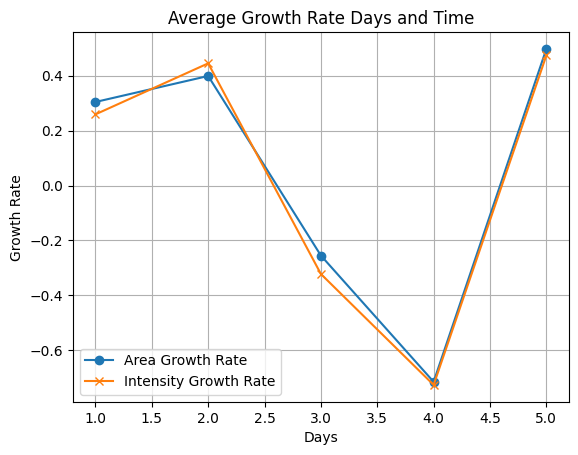

Day 1, Click 1 - Area: 4743.0 pixels squared
Day 1, Click 1 - Mean Intensity: 1.3631357048748354
Day 1, Click 2 - Area: 6187.0 pixels squared
Day 1, Click 2 - Mean Intensity: 1.7167061923583662
Day 1, Click 3 - Area: 8657.0 pixels squared
Day 1, Click 3 - Mean Intensity: 2.4810408432147564
Day 1, Click 4 - Area: 6448.0 pixels squared
Day 1, Click 4 - Mean Intensity: 1.681185770750988
Day 2, Click 1 - Area: 1836.0 pixels squared
Day 2, Click 1 - Mean Intensity: 0.4596837944664032
Day 2, Click 2 - Area: 2750.0 pixels squared
Day 2, Click 2 - Mean Intensity: 0.6776152832674572
Day 2, Click 3 - Area: 2674.0 pixels squared
Day 2, Click 3 - Mean Intensity: 0.6247562582345191
Day 2, Click 4 - Area: 2210.0 pixels squared
Day 2, Click 4 - Mean Intensity: 0.46039525691699607
Day 3, Click 1 - Area: 1551.0 pixels squared
Day 3, Click 1 - Mean Intensity: 0.2878392621870883
Day 3, Click 2 - Area: 1848.0 pixels squared
Day 3, Click 2 - Mean Intensity: 0.3676548089591568
Day 3, Click 3 - Area: 2832.0 

In [48]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function for area calculation
def calculate_area(mask):
    # Calculate the area of the segmented region
    area = np.sum(mask) / 255.0  # Convert to binary mask (0 or 255)
    return area

# Function for intensity analysis
def analyze_intensity(segmented_image):
    # Convert the segmented image to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Compute the mean intensity of the segmented region
    mean_intensity = np.mean(gray_image)
    return mean_intensity

# Function for comparing growth over n days
def compare_growth(data):
    # Assuming 'data' is a list of area or intensity values for each day
    growth_rate = []
    for i in range(1, len(data)):
        rate = (data[i] - data[i-1]) / data[i-1]
        growth_rate.append(rate)
    return growth_rate

# Load segmented images for each day
segmented_images = []
clicks_per_day = 4
total_days = 5

for day in range(1, total_days + 1):
    for click in range(1, clicks_per_day + 1):
        image_path = f"segmented_image_{(day-1)*clicks_per_day + click}.jpg"
        if os.path.exists(image_path):
            segmented_image = cv2.imread(image_path)
            segmented_images.append(segmented_image)
        else:
            print(f"Error: Image for day {day}, click {click} not found.")
            segmented_images.append(None)

# Calculate area and intensity for each day
area_data = []
intensity_data = []
for segmented_image in segmented_images:
    if segmented_image is not None:
        # Threshold the image to obtain the mask of the black fungus colony
        _, binary_image = cv2.threshold(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
        area = calculate_area(binary_image)
        intensity = analyze_intensity(segmented_image)
        area_data.append(area)
        intensity_data.append(intensity)
    else:
        area_data.append(None)
        intensity_data.append(None)

# Compare growth over n days
area_growth_rate = compare_growth(area_data)
intensity_growth_rate = compare_growth(intensity_data)

# Plotting the growth rate graph
total_images = len(segmented_images)  # Calculate total images
total_days = total_images // clicks_per_day  # Calculate total days
days = np.arange(1, total_days + 1)  # Generate x-axis values for each day
plt.plot(days, area_growth_rate[:total_days], marker='o', label='Area Growth Rate')
plt.plot(days, intensity_growth_rate[:total_days], marker='x', label='Intensity Growth Rate')
plt.xlabel('Days')
plt.ylabel('Growth Rate')
plt.title('Average Growth Rate Days and Time')
plt.legend()
plt.grid(True)

plt.savefig('growth_rate_graph1.png')

plt.show()

# Print or visualize the results
for idx, (segmented_image, area, intensity) in enumerate(zip(segmented_images, area_data, intensity_data), start=1):
    if segmented_image is not None:
        # Calculate the corresponding day
        day = (idx - 1) // clicks_per_day + 1
        
        # Display segmented image
        cv2.imshow(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Segmented Image", segmented_image)
        
        # Print area and intensity data
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Area: {area} pixels squared")
        print(f"Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day} - Mean Intensity: {intensity}")

        # Display image of fungus growth
        cv2.imshow(f"Fungus Growth - Day {day}, Click {idx % clicks_per_day if idx % clicks_per_day != 0 else clicks_per_day}", segmented_image)
        
        # Wait for key press to move to next image or exit
        key = cv2.waitKey(0)  # Changed from cv2.waitKey(1)
        if key == 27:  # Esc key to exit
            break
    else:
        print(f"Error: Image for day {day}, click {click} not found.")

cv2.destroyAllWindows()

print("Area Data (in pixels squared):\n", area_data)
print("Intensity Data (mean intensity):\n", intensity_data)
print("Area Growth Rate:\n", area_growth_rate)
print("Intensity Growth Rate:\n", intensity_growth_rate)

